# Iris_MLP

In [1]:
#Imports
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier, LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV #, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, LabelEncoder, MaxAbsScaler, MinMaxScaler
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.losses import MSE, binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy, kl_divergence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.python.keras import Input
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
X,y = fetch_openml(data_id=61,return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.8)

In [5]:
#Die Standardarchitektur des Modells festlegen
def build_nn(activation = 'relu', learning_rate = 3e-2, optimizer = Adam):
    model = Sequential()
    model.add(Dense(100,activation=activation))
    model.add(Dense(100,activation=activation))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss=categorical_crossentropy, 
                  optimizer= optimizer(learning_rate = learning_rate), 
                  metrics=["accuracy"])
    return model

### Classifier ohne pipeline

In [6]:
clf = KerasClassifier(build_nn)

In [7]:
#Klassifikator trainieren
clf.fit(X_train, y_train)

4/4 [==============================] - 1s 2ms/step - loss: 3.5749 - accuracy: 0.4208


In [8]:
#Klassifikator testen
y_pred = clf.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_pred)

c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.6333333333333333

### Simple Pipeline

In [9]:
#Klassifikator Pipeline
steps = [
            ('cleaning', SimpleImputer()),
            ('preprocessing', StandardScaler()),
            ('clf',  KerasClassifier(build_nn) )
        ]
pipe = Pipeline(steps=steps)

#### Simple Pipeline Score:

In [10]:
#Klassifikator trainieren
pipe.fit(X_train, y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.7441 - accuracy: 0.6056


Pipeline(memory=None,
     steps=[('cleaning', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)), ('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F3CFA9A488>)])

In [11]:
#Klassifikator testen
y_pred = pipe.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_pred)

c:\users\caleb\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9

### Confusion Matrix

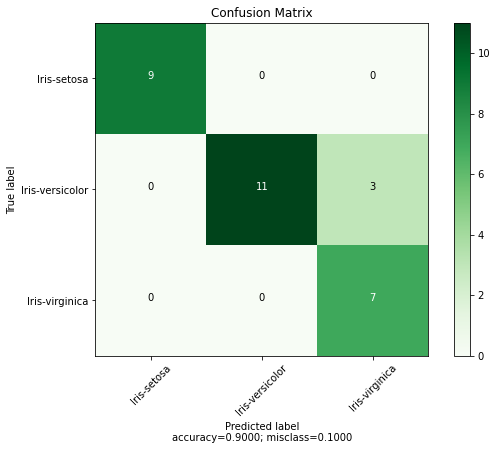

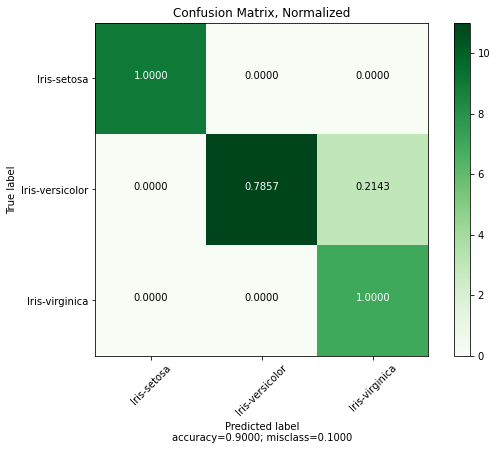

In [12]:
Vor_cm = confusion_matrix(y_pred, y_test)

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
   colors [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
plot_confusion_matrix(cm           = np.array(Vor_cm), 
                      normalize    = False,
                      target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                      title        = "Confusion Matrix")

plot_confusion_matrix(cm           = np.array(Vor_cm), 
                      normalize    = True,
                      target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                      title        = "Confusion Matrix, Normalized")

 